# Feature Detection

- 학번 : 20223196
- 이름 : 이준호

---

OpenCV를 사용하여 다음과 같은 다양한 feature detection 알고리즘을 사용해본다.

- Harris corner detection
- FAST
- ORB (Oriented FAST and Rotated BRIEF)
- SIFT (Scale-Invariant Feature Transform)
- SURF (Speeded-Up Robust Features)


**참고**

- [OpenCV tutorial - Feature Detection and Description](https://docs.opencv.org/master/db/d27/tutorial_py_table_of_contents_feature2d.html)
- [OpenCV document](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html)
- [이미지 특징 추출 (데이터 사이언스 스쿨)](https://datascienceschool.net/03%20machine%20learning/03.02.05%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%ED%8A%B9%EC%A7%95%20%EC%B6%94%EC%B6%9C.html)

---

**[중요] 과제 제출 방법**
- 과제 제출 기한은 가상대학 공지사항을 참고하세요.
- 과제는 Colab에서 작성한 것을 다운받아 (파일 > 다운로드 > .ipynb 다운로드) 가상 대학에 업로드합니다. (이외의 제출 방법은 인정하지 않음)
- 제출 시 파일 제목은 '학번_이름' 으로 저장합니다.

# OpenCV 버전 변경

SIFT, SURF Feature 사용을 위해 현재 Colab 서버에 설치되어 있는 OpenCV 버전을 변경한다.

In [ ]:
!pip3 uninstall opencv-python
!pip3 uninstall opencv-contrib-python
!pip3 install opencv-contrib-python==3.4.18.65

Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_python-4.7.0.72.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Gui-48e93776.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5XcbQpa-c112ba75.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libavcodec-16a334ab.so.59.37.100
    /usr/local/lib/py

In [ ]:
# 관련 패키지 임포트
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

print('python', sys.version)
print('numpy', np.__version__)
print('opencv', cv.__version__)

python 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
numpy 1.22.4
opencv 3.4.18


## Google Drive와 연동하기

구글 드라이브와 colab을 연동하여 드라이브에 있는 파일들을 가져올 수 있게 한다.

- 아래 코드를 실행
- 출력된 링크를 클릭해 구글 계정 로그인 
- 로그인 후 나오는 코드를 복사하여 붙여넣기

[참고: 코랩 사용법 (데이터 사이언스 스쿨)](https://datascienceschool.net/view-notebook/f9d9fddb7cc7494a9e4be99f0e137be0/)


In [ ]:
# mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


좌측의 파일 아이콘을 선택하거나 아래 명령어를 통해 파일을 확인할 수 있다.

In [ ]:
!ls '/content/drive/My Drive/Colab Notebooks/Vehicle Intelligence/'

ls: cannot access '/content/drive/My Drive/Colab Notebooks/Vehicle Intelligence/': No such file or directory


In [ ]:
ROOT = '/content/drive/My Drive/Colab Notebooks/Vehicle Intelligence/work1/'

### opencv를 사용해 이미지 불러오기

- `cv.imread()`를 이용해 이미지를 불러오면 RGB가 아닌 BGR 이미지임을 유의해야 한다.

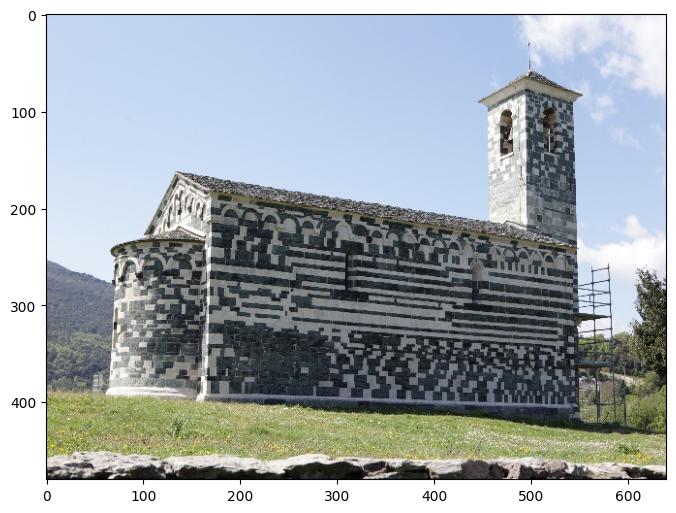

In [ ]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0010.JPG')

plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])
plt.show()

## Harris Corner Detection

해리스 코너 추출 함수 `cornerHarris`는 이미지 위에 커널을 이동시키면서 그레디언트의 변화량을 구하고 이 값을 적절한 기준값으로 구별하여 코너점을 찾는다.

**과제**
- 해리스 코너를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수
`dst	=	cv.cornerHarris(	src, blockSize, ksize, k[, dst[, borderType]]	)` 


In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

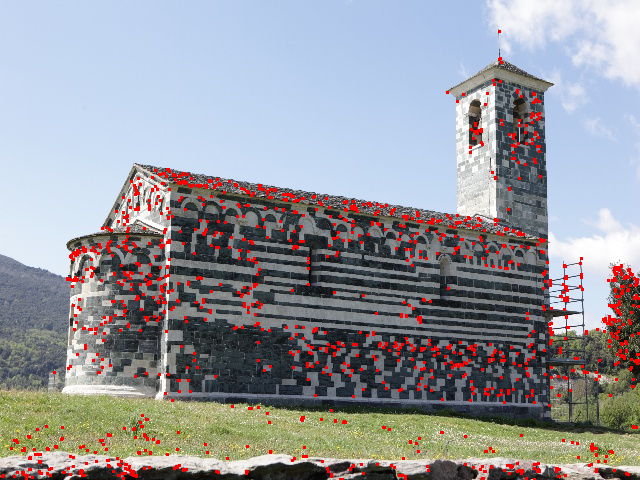

In [ ]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.20)

#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

### Fast Corner Detection 

연산이 빠른 corner detection 알고리즘이다 


**과제**
- FAST feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`	retval	=	cv.FastFeatureDetector_create(	[, threshold[, nonmaxSuppression[, type]]]	)`

Threshold: 80
nonmaxSuppression:True
neighborhood: 2


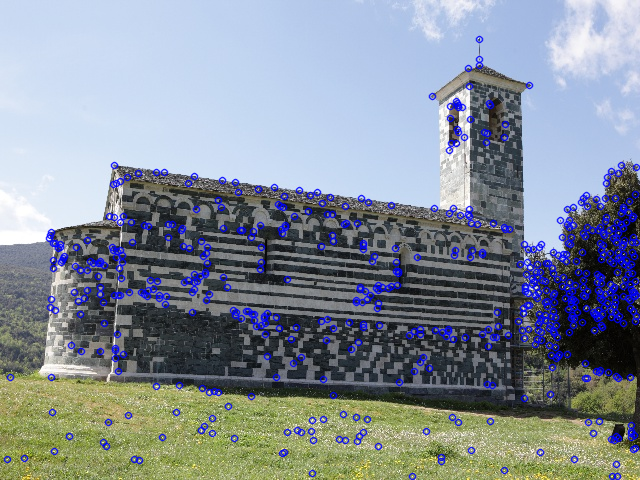

In [ ]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0011.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create(80)

# find and draw the keypoints
keypoints = fast.detect(img,None)

# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )

image_with_keypoints = cv.drawKeypoints(img, keypoints, None, color=(255, 0, 0), flags=0)

# Disable nonmaxSuppression
cv2_imshow(image_with_keypoints)
cv.waitKey(0)
cv.destroyAllWindows()

### ORB(Oriented FAST and Rotated BRIEF) detector

FAST 와 BRIEF를 기반으로 만들어진 알고리즘이다. 논문에서는 SURF와 SIFT보다 매우 빠르고, SURF 보다 정확한, 낮은 컴퓨팅 파워 환경에서 돌리기에 좋은 알고리즘이라 소개 한다.

**과제**
-  ORB feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`	retval	=	cv.ORB_create(	[, nfeatures[, scaleFactor[, nlevels[, edgeThreshold[, firstLevel[, WTA_K[, scoreType[, patchSize[, fastThreshold]]]]]]]]]	)`


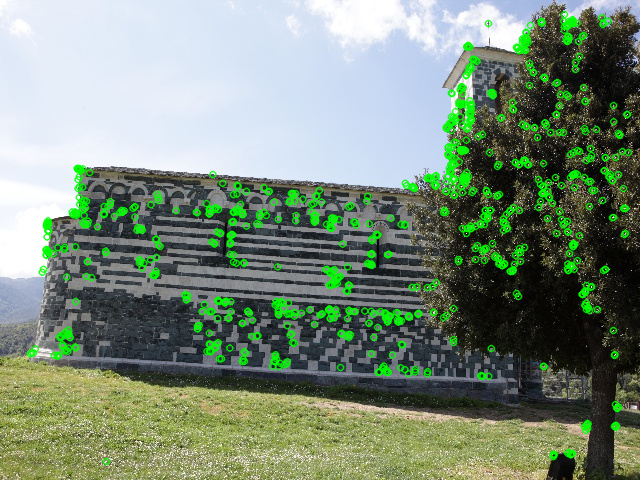

In [ ]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0013.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do

# ORB 특징점 검출기 생성
orb = cv.ORB_create(nfeatures=1000, scaleFactor=1.2, nlevels=8, edgeThreshold=10, firstLevel=0, WTA_K=2, scoreType=cv.ORB_HARRIS_SCORE, patchSize=31, fastThreshold=20)

# 특징점 검출
keypoints = orb.detect(gray, None)

# 특징점 시각화
img_with_keypoints = cv.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=0)

# 결과 출력
cv2_imshow(img_with_keypoints)
cv.waitKey(0)
cv.destroyAllWindows()

### SIFT feature detection

SIFT(Scale-Invariant Feature Transform)은 특징점의 크기와 각도까지 같이 계산하여 이미지의 크기가 변하거나 회전해도 동일한 특징점을 찾을 수 있도록 하는 방법이다. 또한 특징점 근처의 이미지 특성(히스토그램)도 같이 계산해서 특징점 이미지의 모양도 구별할 수 있도록 한다.

**과제**
- SIFT feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`retval	=	cv.SIFT_create(	[, nfeatures[, nOctaveLayers[, contrastThreshold[, edgeThreshold[, sigma]]]]]	)
`

In [ ]:
# 아래 패키지를 임포트한다 
!pip install opencv-contrib-python

import cv2
from cv2 import xfeatures2d

# ORB 특징점 검출기 생성
orb = xfeatures2d.SIFT_create()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


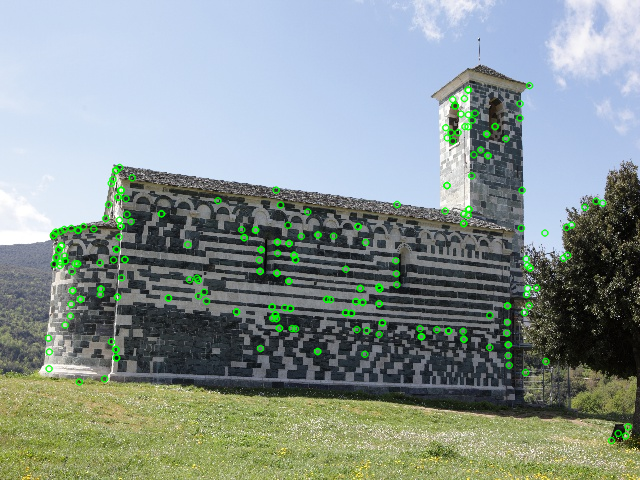

In [ ]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/feature/DPP_0011.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do

# SIFT 특징점 검출기 생성
sift = cv.SIFT_create(255)

# 특징점 검출
keypoints, _ = sift.detectAndCompute(gray, None)

img_with_keypoints = cv.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=0)

cv2_imshow(img_with_keypoints)
cv.waitKey(0)
cv.destroyAllWindows()

### 추가 점수 과제

- 지금까지 사용해본 feature detection 알고리즘들을 조사해 보고, 각 알고리즘간의 차이와 장단점을 서술하시오.
1. Harris Corner Detection

  서브픽셀 정확도가 있는 코너, 때로는 최대 정확도로 모서리를 찾아야 할 수도 있습니다. OpenCV 에는 하위 픽셀 정확도로 감지된 모서리를 더 세분화하는 cv.cornerSubPix() 함수가 있습니다 . 아래는 예시입니다. 늘 그렇듯이 Harris 코너를 먼저 찾아야 합니다. 
  간단해서 계산비용이 낮다.하지만,또한 모서리를 검색하는 이웃의 크기를 정의해야 합니다.
2. Fast Corner Detection 

  기존의 다른 코너 검출기보다 몇 배 더 빠릅니다.
  그러나 높은 수준의 노이즈에는 강하지 않습니다. 임계값에 따라 다릅니다.
  스케일과 회전 불변성 제시 하지 않기 때문에, 정확도가 낮을 수 있다.
3. ORB(Oriented FAST and Rotated BRIEF) detector

  ORB는 기본적으로 FAST 키포인트 검출기와 BRIEF 디스크립터를 융합하여 성능을 향상시키기 위해 많은 수정을 거쳤습니다. 먼저 FAST를 사용하여 키포인트를 찾은 다음 Harris 코너 측정을 적용하여 그 중에서 상위 N개의 포인트를 찾습니다. 또한 다중 스케일 기능을 생성하기 위해 피라미드를 사용합니다. 그러나 한 가지 문제는 FAST가 방향을 계산하지 않는다는 것입니다. 
  키포인트 방향을 따라 방향을 잡으면 이 속성을 잃고 더 분산됩니다. 분산이 높으면 입력에 다르게 반응하므로 기능이 더 차별적입니다. 
  일반적으로 SIFT나 SURF보다 계산 비용이 낮지만, 일부 상황에서 정확도가 낮을 수 있습니다.
4. SIFT feature detection

 1. 스케일 공간 극값 감지
  위의 이미지에서 스케일이 다른 키포인트를 감지하기 위해 동일한 창을 사용할 수 없다는 것이 분명합니다. 작은 코너에서도 OK입니다. 그러나 더 큰 모서리를 감지하려면 더 큰 창이 필요합니다. 이를 위해 스케일 공간 필터링이 사용됩니다.
 2. 키포인트 현지화
  잠재적인 키포인트 위치가 발견되면 보다 정확한 결과를 얻기 위해 세부적으로 조정해야 합니다. 극값의 보다 정확한 위치를 얻기 위해 척도 공간의 Taylor 시리즈 확장을 사용했으며 이 극값의 강도가 임계값(논문에 따라 0.03)보다 작으면 거부됩니다. 이 임계값은 OpenCV에서 contrastThreshold 라고 합니다.
 3. 오리엔테이션 배정
  이제 이미지 회전에 대한 불변성을 달성하기 위해 각 키포인트에 방향이 지정됩니다. 
 4. 키포인트 설명자
  이제 키포인트 설명자가 생성됩니다. 키포인트 주변의 16x16 이웃이 사용됩니다. 4x4 크기의 16개의 하위 블록으로 나뉩니다. 각 하위 블록에 대해 8개의 빈 방향 히스토그램이 생성됩니다. 따라서 총 128개의 빈 값을 사용할 수 있습니다. 키포인트 설명자를 형성하는 벡터로 표현됩니다. 
 5. 키포인트 매칭
  두 이미지 사이의 키포인트는 가장 가까운 이웃을 식별하여 일치시킵니다.

특징점 검출에 대한 특징이 다르다. -> 알고리즘이 다른 설명을 이 이유로 들 수 있다.
검출에 대한 특징, 정확도, 방법, 속도, 스케일과 회전불변성이 다르기 때문에, 사용을 할 때, 상황에 맟춰 고려하면서 알고리즘을 선택하면서 알고리즘을 선택해야한다.
